<a href="https://colab.research.google.com/github/Recollectionss/numeral-methods/blob/main/lab4/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Таблиця розділених різниць:
  i        x       f(x)       Δ^1f(x)       Δ^2f(x)       Δ^3f(x)       Δ^4f(x)       Δ^5f(x)       Δ^6f(x)       Δ^7f(x)       Δ^8f(x)       Δ^9f(x)       Δ^10f(x)       Δ^11f(x)       Δ^12f(x)       Δ^13f(x)       Δ^14f(x)       
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0     0.0000     0.0000     0.9835       -0.2083       -0.2250        0.1433       -0.0115       -0.0306        0.0140       -0.0007       -0.0011        0.0005       -0.0002        0.0000        0.0000       -0.0000    
  1     0.2244     0.2207     0.8900       -0.3598       -0.0963        0.1304       -0.0527       -0.0086        0.0128       -0.0030        0.0001        0.0001       -0.0001        0.0001       -0.0000    
  2     0.4488     0.4204     0.7285       -0.4246        0.0207        0.0713       -

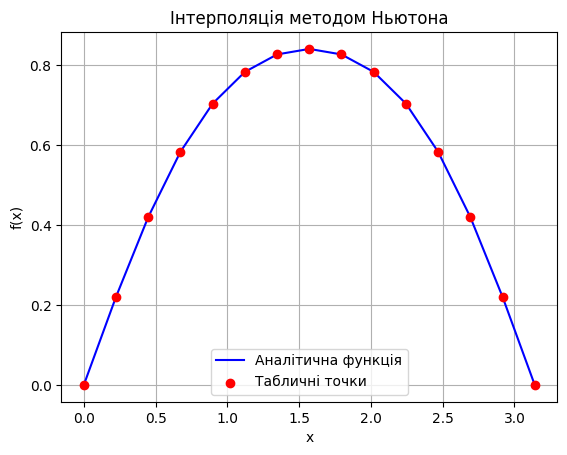

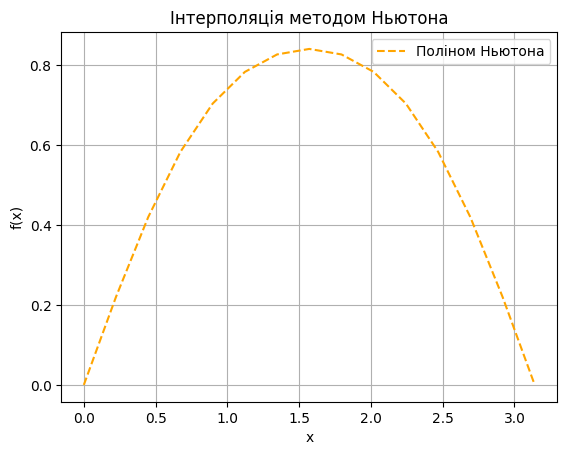

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Аналітична функція
def f(x):
    return np.sin(np.sin(x))

# Таблична функція: 15 рівномірно розташованих точок
x_vals = np.linspace(0, np.pi, 15)
y_vals = f(x_vals)

# Метод Ньютона: побудова інтерполяційного полінома
def newton_interpolation(x_vals, y_vals, x):
    n = len(x_vals)
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y_vals

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i, j] = (divided_diff[i + 1, j - 1] - divided_diff[i, j - 1]) / (x_vals[i + j] - x_vals[i])

    # Побудова полінома Ньютона
    polynomial = divided_diff[0, 0]
    for i in range(1, n):
        term = divided_diff[0, i]
        for j in range(i):
            term *= (x - x_vals[j])
        polynomial += term
    return polynomial, divided_diff  # Повертаємо також таблицю розділених різниць

# Виведення табличних значень для полінома Ньютона
def print_table(x_vals, y_vals, divided_diff):
    print("\nТаблиця розділених різниць:")
    print(f"{'i':>3} {'x':>8} {'f(x)':>10} ", end="      ")
    for j in range(1, len(x_vals)):
        print(f"Δ^{j}f(x)", end="       ")
    print()
    print("-" * 220)
    for i in range(len(x_vals)):
        print(f"{i:3} {x_vals[i]:10.4f} {y_vals[i]:10.4f} ", end="")
        for j in range(1, len(x_vals)):
            if i + j < len(x_vals):
                print(f"{divided_diff[i, j]:10.4f}", end="    ")
        print()

# Обчислення похибки
def calculate_inaccuracy(true_values, interpolated_values):
    inaccuracy = np.abs(true_values - interpolated_values)
    max_inaccuracy = np.max(inaccuracy)
    return inaccuracy, max_inaccuracy

# Перевірка на монотонність
def monotonous_check(values):
    differences = np.diff(values)
    if np.all(differences > 0):
        print("Функція строго зростає")
        return True
    elif np.all(differences < 0):
        print("Функція строго спадає")
        return True
    elif np.all(differences == 0):
        print("Функція стала")
        return True
    else:
        print("Функція не є монотонною")
        return False

# Основна програма
if __name__ == "__main__":
    # Використовуємо лише початкові 15 точок для інтерполяції
    x_interp = x_vals
    y_interp = [newton_interpolation(x_vals, y_vals, x)[0] for x in x_interp]  # Обчислюємо інтерполяцію для кожної точки x_interp
    divided_diff = newton_interpolation(x_vals, y_vals, x_interp[0])[1]  # Таблиця розділених різниць (одна для всіх)

    # Виведення табличних значень
    print_table(x_vals, y_vals, divided_diff)

    # Виконуємо інтерполяцію на тестових точках
    interpolated_values = np.array([newton_interpolation(x_vals, y_vals, x)[0] for x in x_vals])

    # Обчислюємо похибку
    inaccuracy, max_inaccuracy = calculate_inaccuracy(f(x_vals), interpolated_values)
    print(f"Максимальна похибка: {max_inaccuracy:.6f}")

    # Перевірка монотонності функції
    monotonous_check(f(x_vals))

    # Побудова графіків
    plt.plot(x_vals, [f(x) for x in x_vals], label="Аналітична функція", color="blue")
    plt.scatter(x_vals, y_vals, color="red", label="Табличні точки", zorder=5)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Інтерполяція методом Ньютона")
    plt.grid(True)
    plt.show()

    plt.plot(x_interp, y_interp, label="Поліном Ньютона", linestyle="--", color="orange")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Інтерполяція методом Ньютона")
    plt.grid(True)
    plt.show()
